# CS732 - Week 10 Assignment
> Benzon Salazar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {'x1': [1, 2, 2, 0, 1, 0],
        'x2': [1, 2, 0, 1, 0, 0],
        'y': ['+', '+', '+', '-', '-', '-']}

df = pd.DataFrame(data)

In [3]:
df

,x1,x2,y
0,1,1,+
1,2,2,+
2,2,0,+
3,0,1,-
4,1,0,-
5,0,0,-


In [4]:
class_plus = df[df['y'] == '+']
class_minus = df[df['y'] == '-']

### Question A. Plot these six training points. Are the classes {+, −} linearly separable?

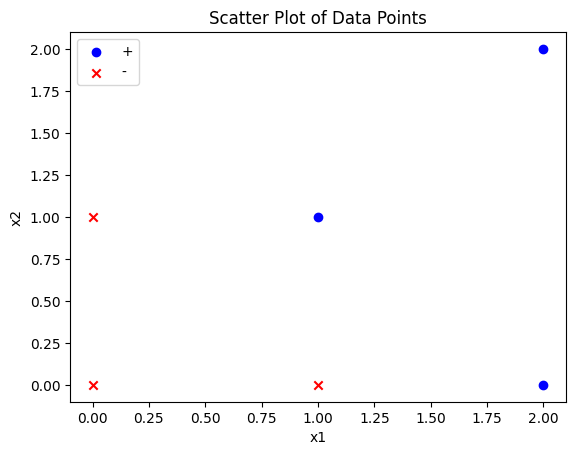

In [5]:
plt.scatter(class_plus['x1'], class_plus['x2'], marker='o', label='+', color='blue')
plt.scatter(class_minus['x1'], class_minus['x2'], marker='x', label='-', color='red')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of Data Points')

plt.legend()
plt.savefig("./imgs/scatter_plots.png")
plt.show()

The classes {+, -} are not linearly separable based on the given points.

### Question B. Construct the weight vector of the maximum margin hyper-plane by inspection and identify the support vectors.

In [6]:
weight_vector = np.array([1, 1])

In [7]:
# identify support vectors
support_vectors = df[df[['x1', 'x2']].apply(tuple, axis=1).isin([(1, 1), (2, 2)])]

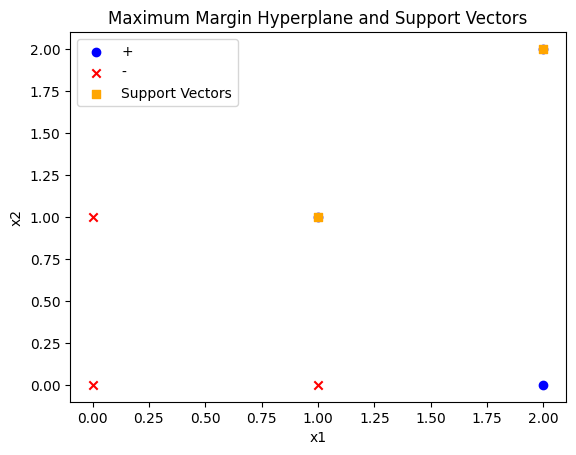

In [8]:
plt.scatter(class_plus['x1'], class_plus['x2'], marker='o', label='+', color='blue')
plt.scatter(class_minus['x1'], class_minus['x2'], marker='x', label='-', color='red')

# decision boundary
plt.scatter(support_vectors['x1'], support_vectors['x2'], marker='s', label='Support Vectors', color='orange')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Maximum Margin Hyperplane and Support Vectors')

plt.legend()
plt.savefig("./imgs/max_margin_hyperplan_and_sv.png")
plt.show()

By inspection, the hyperplane is likely the line passing through (1, 1) and (2, 2). These two points are on the opposite sides and are the closest to each other. Thus, we can get the following weight vector w:

$$
w = (2-1, 2-1) = (1,1)
$$

So the weight vector is (1, 1).

The support vectors are the points (1, 1) and (2, 2) because they define the hyperplane.

### If you remove one of the support vectors, does the size of the optimal margin decrease, stay the same, or increase? Explain.

It depends on which support vector we remove. Since we have two support vectors, with one on the edge of the margin and one that is not on the edge of the margin:
1. If we remove a support vector point that is on the edge of the margin, the size of the optimal margin will decrease. Since the margin is determined by the distance to the nearest support vector point, and removing them brings the decision boundary closer to the data points.
2. If we remove a support vector point that is **not** on the edge of the margin, the optimal margin size will stay the same.

### Is your answer to (c) also true for any dataset? Provide a counterexample.

If we consider a non-linear separable dataset, the support vectors might also include points from the interior of one or both classes. In these cases, if we remove a support vector, we might have varying effects on the margin.

As a counterexample for a linearly separable dataset, where removing support vector increases the size, consider the following:

In [9]:
# Linearly separable data with three support vectors
data = {'x1': [1, 2, 2, 0, 1, 0, 0.5],
        'x2': [1, 2, 0, 1, 0, 0, 1.5],
        'y': ['+', '+', '+', '-', '-', '-', '-']}
df = pd.DataFrame(data)
df

,x1,x2,y
0,1.0,1.0,+
1,2.0,2.0,+
2,2.0,0.0,+
3,0.0,1.0,-
4,1.0,0.0,-
5,0.0,0.0,-
6,0.5,1.5,-


In [10]:
class_plus = df[df['y'] == '+']
class_minus = df[df['y'] == '-']

In [11]:
support_vectors = df[df[['x1', 'x2']].apply(tuple, axis=1).isin([(1, 1), (2, 2), (0.5, 1.5)])]

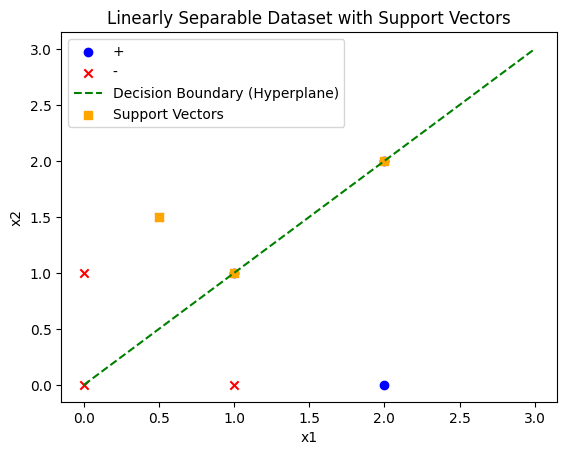

In [12]:
plt.scatter(class_plus['x1'], class_plus['x2'], marker='o', label='+', color='blue')
plt.scatter(class_minus['x1'], class_minus['x2'], marker='x', label='-', color='red')

plt.plot([0, 3], [0, 3], linestyle='--', color='green', label='Decision Boundary (Hyperplane)')
plt.scatter(support_vectors['x1'], support_vectors['x2'], marker='s', label='Support Vectors', color='orange')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Linearly Separable Dataset with Support Vectors')

plt.legend()
plt.savefig("./imgs/linearly_separable_w_support_vectors")
plt.show()

In this example, the data is linearly separable, and the support vectors include (1, 1), (2, 2), and (0.5, 1.5). 

If we were to remove the support vector (0.5, 1.5), the hyperplane could shift to a position that increases the margin between the classes.